In [8]:
import re
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
#### Read_Data
data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DataArtikel.csv",encoding = "ISO-8859-1")

In [11]:
#### Visualize your data
print("Let's explore our word set",data["Word"])
print("length of training set",len(data["Word"]))
print("Unique answers are",set(data["Type"]),"and number of unique answers are",len(set(data["Type"])))

Let's explore our word set 0             Virus
1            Corona
2            adalah
3             jenis
4              baru
           ...     
101          berat,
102         seperti
103         infeksi
104       paru-paru
105    (penumonia).
Name: Word, Length: 106, dtype: object
length of training set 106
Unique answers are {'pronomina', 'homonim', 'nomina', 'verba', 'adjektiva', 'konjungsi', 'adverbial', 'numeralia'} and number of unique answers are 8


In [12]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

def show_wordcloud(data, title = None):
  wordcloud = WordCloud(background_color='black',).generate(str(data))

  fig = plt.figure(1, figsize=(12, 12))
  plt.axis('off')
  plt.imshow(wordcloud)
  plt.show()

In [13]:
word_list=[]
list_word=list(data["Word"])
print(list_word)
for sentence in list_word:
  words_sentence=sentence.split()
  for words in words_sentence:
    word_list.append(words)

word_list=[word for sentence in list(data["Word"]) for word in sentence.split()]

['Virus', 'Corona', 'adalah', 'jenis', 'baru', 'dari', 'coronavirus', 'yang', 'menular', 'ke', 'manusia. ', 'Virus', 'ini', 'bisa', 'menyerang', 'siapa', 'saja, ', 'seperti', 'lansia', '(golongan ', 'usia', 'lanjut), ', 'orang', 'dewasa, ', 'anak-anak, ', 'dan', 'bayi, ', 'termasuk', 'ibu', 'hamil', 'dan', 'ibu', 'menyusui. ', 'Infeksi', 'virus ', 'Corona', 'disebut', 'COVID-19 ', '(Corona', 'Virus', 'Disease', '2019) ', 'dan', 'pertama', 'kali', 'ditemukan', 'di', 'kota', 'Wuhan, ', 'China', 'pada', 'akhir', 'Desember', '2019', 'Virus', 'ini', 'menular', 'dengan', 'sangat', 'cepat', 'dan', 'telah', 'menyebar', 'ke', 'hampir', 'semua', 'negara, ', 'termasuk', 'Indonesia, ', 'hanya ', 'dalam', 'waktu', 'beberapa', 'bulan.', 'Coronavirus', 'adalah ', 'kumpulan', 'virus', 'yang', 'bisa', 'menginfeksi', 'pernapasan.', 'Pada', 'banyak', 'kasus,', 'virus', 'ini', 'hanya ', 'menyebabkan', 'infeksi', 'pernapasan,', 'seperti', 'flu.', 'Namun,', 'virus', 'ini', 'juga', 'bisa', 'menyebabkan', 'in

In [14]:
#### Now ler's find the frequency of each word and the most common words in the corpus
frequency=Counter(word_list)
print(frequency)
print(frequency.most_common(5))

Counter({'Virus': 4, 'ini': 4, 'dan': 4, 'virus': 4, 'bisa': 3, 'seperti': 3, 'infeksi': 3, 'Corona': 2, 'adalah': 2, 'yang': 2, 'menular': 2, 'ke': 2, 'termasuk': 2, 'ibu': 2, 'hanya': 2, 'menyebabkan': 2, 'jenis': 1, 'baru': 1, 'dari': 1, 'coronavirus': 1, 'manusia.': 1, 'menyerang': 1, 'siapa': 1, 'saja,': 1, 'lansia': 1, '(golongan': 1, 'usia': 1, 'lanjut),': 1, 'orang': 1, 'dewasa,': 1, 'anak-anak,': 1, 'bayi,': 1, 'hamil': 1, 'menyusui.': 1, 'Infeksi': 1, 'disebut': 1, 'COVID-19': 1, '(Corona': 1, 'Disease': 1, '2019)': 1, 'pertama': 1, 'kali': 1, 'ditemukan': 1, 'di': 1, 'kota': 1, 'Wuhan,': 1, 'China': 1, 'pada': 1, 'akhir': 1, 'Desember': 1, '2019': 1, 'dengan': 1, 'sangat': 1, 'cepat': 1, 'telah': 1, 'menyebar': 1, 'hampir': 1, 'semua': 1, 'negara,': 1, 'Indonesia,': 1, 'dalam': 1, 'waktu': 1, 'beberapa': 1, 'bulan.': 1, 'Coronavirus': 1, 'kumpulan': 1, 'menginfeksi': 1, 'pernapasan.': 1, 'Pada': 1, 'banyak': 1, 'kasus,': 1, 'pernapasan,': 1, 'flu.': 1, 'Namun,': 1, 'juga': 1

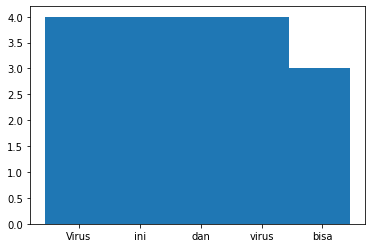

In [15]:
import numpy as np

labels,values = zip(*frequency.items())
labels=[]
values=[]
for T in frequency.most_common(5):
  labels.append(T[0])
  values.append(T[1])

indexes = np.arange(len(labels))
width = 1

plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.05, labels)
plt.show()

In [16]:
### Remove puntuations and change words to lower case
def remove_punctuations(text):
  words=[word.lower()for word in text.split()]
  words=[w for word in words for w in re.sub(r'[^\w\s]','',word).split()]
  return words

data["word_punctuation_removed"]=data["Word"].apply(remove_punctuations)
print(data["word_punctuation_removed"])

0          [virus]
1         [corona]
2         [adalah]
3          [jenis]
4           [baru]
          ...     
101        [berat]
102      [seperti]
103      [infeksi]
104     [paruparu]
105    [penumonia]
Name: word_punctuation_removed, Length: 106, dtype: object


In [17]:
pip install Sastrawi

In [19]:
# import StopWordRemoverFactory class 
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

In [20]:
### Remove Stopwords
factory = StopWordRemoverFactory()
stop = factory.get_stop_words()
print(stop)
def remove_stopwords(text):
  modified_word_list=[word for word in text if word not in stop]
  return modified_word_list

data["word_stopword_removed"]=data["word_punctuation_removed"].apply(remove_stopwords)
print(data["word_stopword_removed"])

['yang', 'untuk', 'pada', 'ke', 'para', 'namun', 'menurut', 'antara', 'dia', 'dua', 'ia', 'seperti', 'jika', 'jika', 'sehingga', 'kembali', 'dan', 'tidak', 'ini', 'karena', 'kepada', 'oleh', 'saat', 'harus', 'sementara', 'setelah', 'belum', 'kami', 'sekitar', 'bagi', 'serta', 'di', 'dari', 'telah', 'sebagai', 'masih', 'hal', 'ketika', 'adalah', 'itu', 'dalam', 'bisa', 'bahwa', 'atau', 'hanya', 'kita', 'dengan', 'akan', 'juga', 'ada', 'mereka', 'sudah', 'saya', 'terhadap', 'secara', 'agar', 'lain', 'anda', 'begitu', 'mengapa', 'kenapa', 'yaitu', 'yakni', 'daripada', 'itulah', 'lagi', 'maka', 'tentang', 'demi', 'dimana', 'kemana', 'pula', 'sambil', 'sebelum', 'sesudah', 'supaya', 'guna', 'kah', 'pun', 'sampai', 'sedangkan', 'selagi', 'sementara', 'tetapi', 'apakah', 'kecuali', 'sebab', 'selain', 'seolah', 'seraya', 'seterusnya', 'tanpa', 'agak', 'boleh', 'dapat', 'dsb', 'dst', 'dll', 'dahulu', 'dulunya', 'anu', 'demikian', 'tapi', 'ingin', 'juga', 'nggak', 'mari', 'nanti', 'melainkan', '

In [21]:
def negation_handling(words):
  counter=False
  wlist=[]
  negations=["tidak","tak","tanpa","bukan"]
  #for words in wordlist:
  for i,j in enumerate(words):
    if j in negations and i<len(words)-1:
      wlist.append(str(words[i]+'-'+words[i+1]))
      counter=True
    else:
        if counter is False:
          wlist.append(words[i])
        else:
            counter=False
    return wlist

data["word_negated"]=data["word_punctuation_removed"].apply(negation_handling)
print(data["word_negated"])


0          [virus]
1         [corona]
2         [adalah]
3          [jenis]
4           [baru]
          ...     
101        [berat]
102      [seperti]
103      [infeksi]
104     [paruparu]
105    [penumonia]
Name: word_negated, Length: 106, dtype: object


In [22]:
pip install nltk

In [23]:
import nltk

In [24]:
 nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [25]:
from nltk.tag import pos_tag


def descriptive_words(words):
  meaningful_words=[]
  tags=['VB','VBP','VBD','VBG','VBN','JJ','JJR','JJS','RB','RBR','RBS','UH','NN','NNP']
  tagged_word=pos_tag(words)
  for word in tagged_word:
    if word[1] in tags:
      meaningful_words.append(word[0])
    return meaningful_words
data["word_descriptive"]=data["word_negated"].apply(descriptive_words)
print(data["word_descriptive"])

0          [virus]
1         [corona]
2         [adalah]
3          [jenis]
4           [baru]
          ...     
101        [berat]
102      [seperti]
103      [infeksi]
104     [paruparu]
105    [penumonia]
Name: word_descriptive, Length: 106, dtype: object


In [26]:
### streaming of words 
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
st=StemmerFactory()
stemmer = st.create_stemmer()
def Stemming(text):
  stemmed_words=[stemmer.stem(word)for word in text]
  return stemmed_words

data["word_stemmed"]=data["word_descriptive"].apply(Stemming)
print(data["word_stemmed"])

0          [virus]
1         [corona]
2         [adalah]
3          [jenis]
4           [baru]
          ...     
101        [berat]
102      [seperti]
103      [infeksi]
104     [paruparu]
105    [penumonia]
Name: word_stemmed, Length: 106, dtype: object


In [27]:
## Recreating the sentence
def Recreate(text):
  word=" ".join(text)
  return word

data["modified_sentence"]=data["word_stemmed"].apply(Recreate)
print (data["modified_sentence"])

0          virus
1         corona
2         adalah
3          jenis
4           baru
         ...    
101        berat
102      seperti
103      infeksi
104     paruparu
105    penumonia
Name: modified_sentence, Length: 106, dtype: object


In [28]:
def Cleaning(text):
  text_punctuation_removed=remove_punctuations(text)
  text_unnegated=negation_handling(text_punctuation_removed)
  text_descriptive=descriptive_words(text_unnegated)
  text_stemmed=Stemming(text_descriptive)
  final_text=Recreate(text_stemmed)
  return final_text

data["modified_sentence"]=data["Word"].apply(Cleaning)
print (data["modified_sentence"])

0          virus
1         corona
2         adalah
3          jenis
4           baru
         ...    
101        berat
102      seperti
103      infeksi
104     paruparu
105    penumonia
Name: modified_sentence, Length: 106, dtype: object


In [29]:
pip install --user --install-option="--prefix=" -U scikit-learn

/usr/local/lib/python3.7/dist-packages/pip/_internal/commands/install.py:283: UserWarning: Disabling all use of wheels due to the use of --build-options / --global-options / --install-options.
  cmdoptions.check_install_build_global(options)
Requirement already up-to-date: scikit-learn in /usr/local/lib/python3.7/dist-packages (0.24.2)


In [30]:
pip install "scikit_learn==0.22.2.post1"

     |████████████████████████████████| 7.1MB 4.3MB/s 
  Found existing installation: scikit-learn 0.24.2
    Uninstalling scikit-learn-0.24.2:
      Successfully uninstalled scikit-learn-0.24.2


In [31]:
pip install scikit_learn

In [32]:
pip install -U scikit-learn

  Using cached https://files.pythonhosted.org/packages/a8/eb/a48f25c967526b66d5f1fa7a984594f0bf0a5afafa94a8c4dbc317744620/scikit_learn-0.24.2-cp37-cp37m-manylinux2010_x86_64.whl
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [33]:
pip install --user --install-option="--prefix=" -U scikit-learn

/usr/local/lib/python3.7/dist-packages/pip/_internal/commands/install.py:283: UserWarning: Disabling all use of wheels due to the use of --build-options / --global-options / --install-options.
  cmdoptions.check_install_build_global(options)
Requirement already up-to-date: scikit-learn in /usr/local/lib/python3.7/dist-packages (0.24.2)


In [34]:
## Change the sentence into a bag of word model
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data["Word"]).toarray()
print(X)
print(vectorizer.get_feature_names())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
['19', '2019', 'adalah', 'akhir', 'anak', 'banyak', 'baru', 'bayi', 'beberapa', 'berat', 'bisa', 'bulan', 'cepat', 'china', 'corona', 'coronavirus', 'covid', 'dalam', 'dan', 'dari', 'dengan', 'desember', 'dewasa', 'di', 'disease', 'disebut', 'ditemukan', 'flu', 'golongan', 'hamil', 'hampir', 'hanya', 'ibu', 'indonesia', 'infeksi', 'ini', 'jenis', 'juga', 'kali', 'kasus', 'ke', 'kota', 'kumpulan', 'lanjut', 'lansia', 'manusia', 'menginfeksi', 'menular', 'menyebabkan', 'menyebar', 'menyerang', 'menyusui', 'namun', 'negara', 'orang', 'pada', 'paru', 'penumonia', 'pernapasan', 'pertama', 'saja', 'sangat', 'semua', 'seperti', 'siapa', 'telah', 'termasuk', 'usia', 'virus', 'waktu', 'wuhan', 'yang']


In [45]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline, FeatureUnion
model = Pipeline([('vectorizer', CountVectorizer()),
                  ('tfidf', TfidfTransformer())])

X_train = model.fit_transform(data["modified_sentence"]).toarray()
print(X_train)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [44]:
Y=data["answer"]
question="kapan covid berkahir?"

KeyError: ignored

In [39]:
from sklearn.naive_bayes import MultinomialNB
clf2 = MultinomialNB().fit(X_train, Y)

P=model.transform([Cleaning(question)])
predict2=clf2.predict(P)
print (predict2)

NameError: ignored

In [40]:
final_predict=[]
final_predict=list(predict)
final_predict=Counter(final_predict)
print ("Thus answer to your question is", final_predict.most_common(1)[0][0])

NameError: ignored

In [41]:
## Generate Answer
answer_dictionary={
    "statement":["Virus Corona yang menyebabkan COVID-19 bisa menyerang siapa saja."]
    "product":["Rapid test untuk mendeteksi antibodi (IgM dan IgG) yang diproduksi oleh tubuh untuk melawan virus Corona"]
    "treatment":["Beberapa pasien dengan gejala ringan atau tanpa gejala akan di sarankan untuk melakukan protokol isolasi mandiri di rumah sambil tetap melakukan langkah pencegahan penyebaran infeksi virus Corona."]
    "precaution":["Melakukan Vaksinasi, Melakukan Physical Distancing, Menggunakan Masker, Menjaga imunitas tubuh, Menjaga Kesehatan Tubuh, Menjaga Kebersihan Lingkungan dan Benda Sekitar."]
}

SyntaxError: ignored

In [42]:
import random

def generate_answer(predict_class):
  ans=random.choice(answer_dictionary[predict_class])
  return ans

In [43]:
## the chatbot ##
question = input("Enter Question = ")
prediction=Predict(question)
ans=generate_answer(prediction)
print("Answer = ",ans)

Enter Question = kapan harus ke dokter


NameError: ignored